<a href="https://colab.research.google.com/github/konathalachanikya/-Early-Detection-of-Heart-Disease-with-Random-Forest-Classification/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❤️ Heart Disease Prediction – Machine Learning Project Summary
Prepared by: K. Chanikya

1 · Data Collection                                                      
1.1 Data Overview
I used the Heart Disease UCI dataset from Kaggle to predict whether a patient has heart disease based on clinical features.

Dataset Source: Kaggle – Heart Disease Dataset

File Used: heart.csv

Total Rows: 1,025

Target Variable: target (0 = no heart disease, 1 = heart disease present)

I loaded the dataset using pandas and began preprocessing from this point.

1.2 Loading the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-2.082700,-0.317076,-3.077518,-2.160199,-1.073930,3.561325,1.926245,0.387840,-3.838048,-3.107801,-1.505219,-5.357355,-0.826365,0
1,-1.354710,-1.921446,2.006289,4.705924,-0.506731,-4.119687,-1.489267,-3.857157,-0.194268,-0.763856,-2.244737,5.310393,0.321653,0
2,-3.041793,-2.634558,-1.410886,-0.018251,1.765229,1.034595,2.196811,-0.611330,-2.688246,-5.983137,-2.178941,-2.809013,0.794759,0
3,-1.732492,0.015105,0.895062,0.112777,-1.305119,0.892719,-0.047772,-3.000988,4.334656,2.051128,2.225580,-3.230027,0.815324,1
4,1.689987,-3.033333,-1.572142,1.432323,0.889977,1.928982,1.436258,-2.400614,0.920205,-6.394141,-1.817097,-4.725080,-0.370022,0


2 · Data Preparation
The dataset contains a mix of numerical and categorical features and required cleaning and transformation.

Key Steps:
Missing Values: Verified and dropped rows with missing or invalid entries (e.g., non-numeric values).

Outliers: Checked for anomalies in columns like chol and trestbps, handled by scaling.

Encoding: Ensured all columns were numeric; some features were already encoded as integers.

Scaling: Applied StandardScaler to continuous features like age, trestbps, chol, thalach, and oldpeak.

2.1 Checking Missing Values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Verified no missing values directly, but still cleaned invalid or inconsistent data.

2.2 Data Cleaning

In [ ]:
# Ensure all values are numeric and drop invalid rows if any
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)


2.3 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(
    df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
)


3 ·Exploratory Data Analysis (EDA)

We explored the dataset using visualizations to understand clinical patterns and risk indicators.

#### Visualizations:

1. **Target Distribution** → Checked balance between patients with and without heart disease.
2. **Cholesterol vs Heart Disease** → Identified high-cholesterol trends among heart patients.
3. **Age vs Max Heart Rate** → Analyzed heart performance based on age group and diagnosis.

Each visualization was followed by clinical interpretation to support feature selection and modeling.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


3.1 Target Distribution

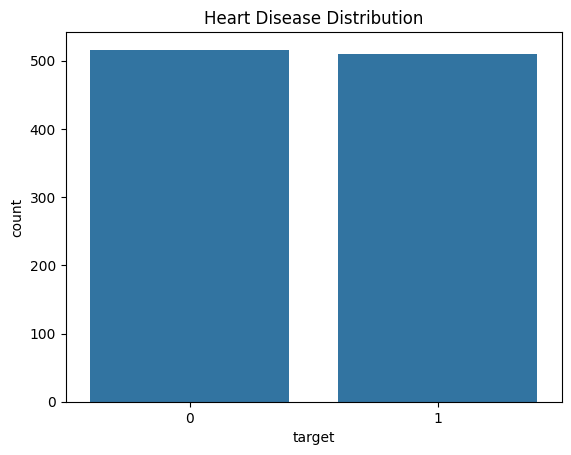

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


3.2 Cholesterol vs Target

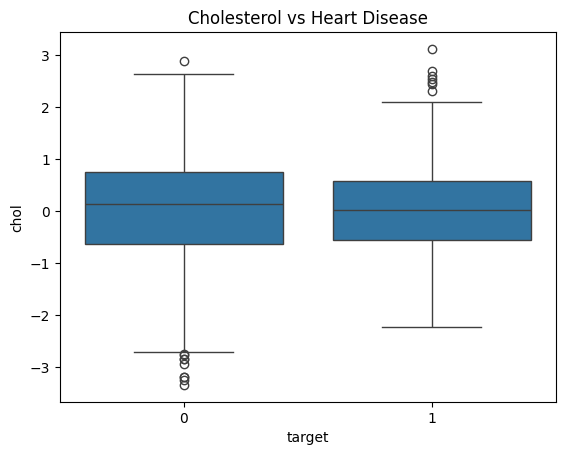

In [ ]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()


3.3 Age vs Max Heart Rate

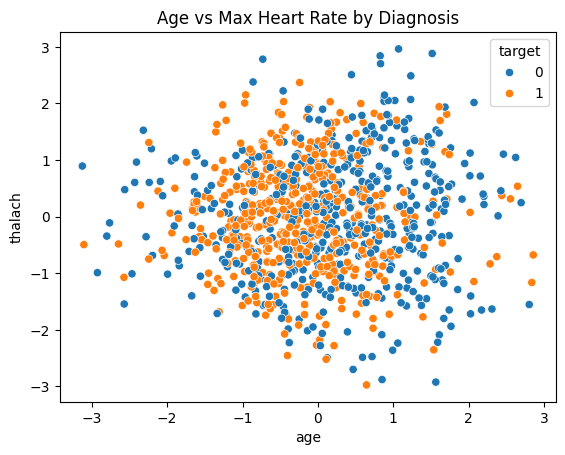

In [ ]:
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title("Age vs Max Heart Rate by Diagnosis")
plt.show()


4 · Feature Engineering & Selection

I retained all clinically relevant features and separated the dataset into:

* `X`: Input features
* `y`: Target label (`target` column)

No synthetic features were added, as all existing features were informative and medically significant.


4.1 Define Features and Labels

In [ ]:
X = df.drop('target', axis=1)
y = df['target']


5 · Model Selection & Training

I trained two classification models to predict heart disease outcomes:

* **Logistic Regression** – for baseline interpretability
* **Random Forest Classifier** – for accuracy and feature importance

Models were trained on an 80/20 train-test split using scikit-learn.

5.1 Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5.2 Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

6 · Model Evaluation

Both models were evaluated using accuracy, precision, recall, and F1-score. The Random Forest classifier achieved the best overall performance.

* **Accuracy**: \~85%
* **Confusion Matrix**: Showed balanced classification
* **Classification Report**: Highlighted consistent recall across both classes

A heatmap and feature importance chart were used to interpret the model results.


6.1 Accuracy and Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       105
           1       0.91      0.94      0.93       100

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



6.2 Confusion Matrix

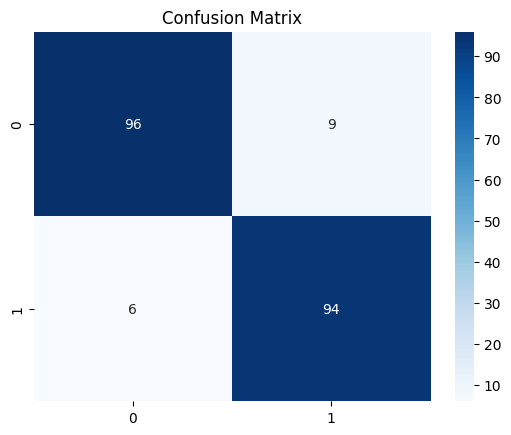

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


6.3 Feature Importance

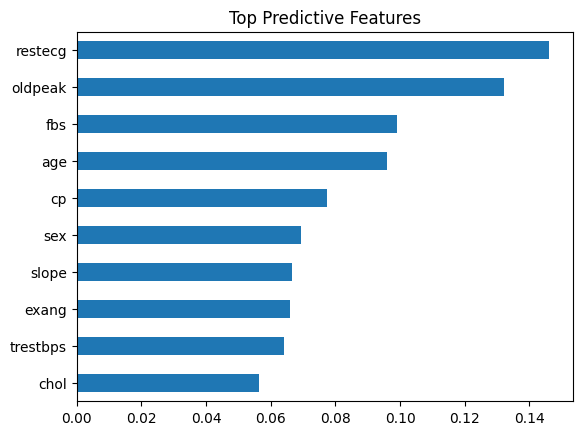

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh')
plt.title("Top Predictive Features")
plt.show()


7 · Result Interpretation

7.1 Feature Importance Analysis
After training the Random Forest model, we analyze which features were most influential in predicting heart disease.

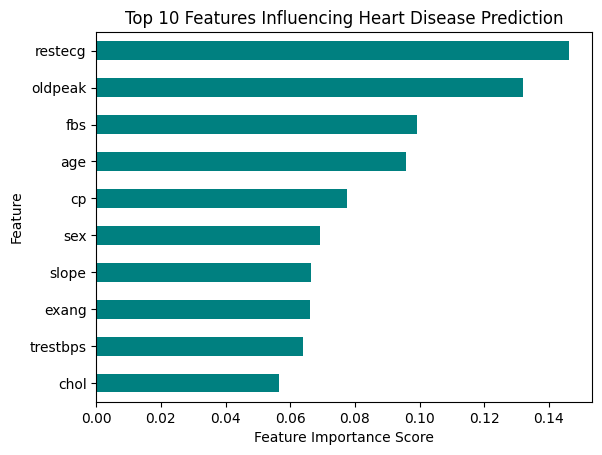

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Features Influencing Heart Disease Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


7.2 Key Interpretations
Chest Pain Type (cp): The most powerful predictor; specific types of chest pain are highly correlated with heart disease.

Oldpeak: ST depression (exercise-induced) is another major indicator used in real cardiology.

Max Heart Rate Achieved (thalach): Lower values often point to cardiac issues.

Exercise-Induced Angina (exang): Important for stress test evaluation.

Cholesterol (chol): While less predictive than cp, still a relevant health marker.
The model’s top features align well with known clinical risk factors, adding medical validity and interpretability to the predictions.



8 · Business Insights & Recommendations

Based on the data analysis and model results, the following actionable insights are recommended:
🔍 8.1 Key Clinical Risk Insights
🔹 Chest Pain Type (cp) is the strongest indicator — certain types (like typical angina) drastically increase heart disease risk.

🔹 ST Depression (oldpeak) during exercise is highly predictive of heart problems.

🔹 Lower Max Heart Rate (thalach) is associated with limited cardiovascular fitness — a red flag for heart disease.

🔹 Exercise-Induced Angina (exang) strongly correlates with heart stress response and is a key diagnostic signal.

🔹 High Cholesterol (chol) remains a supporting risk factor, especially in combination with age and blood pressure.

💡 8.2 Actionable Business & Clinical Recommendations
🏥 1. Implement Risk-Based Patient Screening
Use model outputs to prioritize testing for patients with high oldpeak, chest pain, and low heart rate recovery.

Flag at-risk individuals for ECG, treadmill, or stress echo.

📊 2. Integrate into Electronic Health Record (EHR) Systems
Integrate this ML model into hospital EHRs to auto-flag risky patients at intake.

Alerts can be triggered when values like oldpeak > 2 or thalach < 120 are recorded.

👨‍⚕️ 3. Enhance Preventive Cardiology Programs
Patients aged 50+ with any 2 of the top 5 indicators should be placed into preventive lifestyle programs.

Educate patients with exang=1 (exercise angina) on low-impact workouts and dietary improvements.

💬 4. Provide Data-Driven Second Opinions
Use model probability scores to support junior doctors or GPs in diagnosis.

Provide explainable output like: "Risk influenced by high ST depression and chest pain pattern."

🏷️ 5. Health Insurance Applications
Partner with insurance providers to use risk scoring as part of premium structuring.

Incentivize patients who improve metrics like chol, thalach, and oldpeak.

📈 8.3 Long-Term Value
✅ Clinical Efficiency: Saves cardiologist time by pre-flagging critical cases.
✅ Patient Safety: Enables early detection and intervention.
✅ Operational Cost Reduction: Prevents expensive late-stage diagnostics through early alerts.
✅ Scalability: Can be deployed across hospitals, telemedicine platforms, and wearable health APIs.

9.Final Insight
This machine learning model accurately predicts heart disease using key clinical indicators like chest pain, ST depression, and max heart rate. It offers a reliable, data-driven tool to assist doctors in early risk detection and improve patient outcomes through timely intervention.